![image info](https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/images/banner_1.png)

# Proyecto 1 - Predicción de precios de vehículos usados

En este proyecto podrán poner en práctica sus conocimientos sobre modelos predictivos basados en árboles y ensambles, y sobre la disponibilización de modelos. Para su desasrrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 1: Predicción de precios de vehículos usados".

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 4. Sin embargo, es importante que avancen en la semana 3 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 4, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/competitions/miad2024-12-prediccion-precio-vehiculos).

## Datos para la predicción de precios de vehículos usados

En este proyecto se usará el conjunto de datos de Car Listings de Kaggle, donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como: año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

## Ejemplo predicción conjunto de test para envío a Kaggle

En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np

In [11]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTrain_carListings.zip')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTest_carListings.zip', index_col=0)

In [4]:
# Visualización datos de entrenamiento
dataTraining.head()

,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,FL,Jeep,Wrangler
1,37895,2015,20578,OH,Chevrolet,Tahoe4WD
2,18430,2012,83716,TX,BMW,X5AWD
3,24681,2014,28729,OH,Cadillac,SRXLuxury
4,26998,2013,64032,CO,Jeep,Wrangler


In [5]:
# Visualización datos de test
dataTesting.head()

,Year,Mileage,State,Make,Model
ID,,,,,
0,2014,31909,MD,Nissan,MuranoAWD
1,2017,5362,FL,Jeep,Wrangler
2,2014,50300,OH,Ford,FlexLimited
3,2004,132160,WA,BMW,5
4,2015,25226,MA,Jeep,Grand


In [6]:
# Predicción del conjunto de test - acá se genera un número aleatorio como ejemplo
np.random.seed(42)
y_pred = pd.DataFrame(np.random.rand(dataTesting.shape[0]) * 75000 + 5000, index=dataTesting.index, columns=['Price'])

In [7]:
# Guardar predicciones en formato exigido en la competencia de kaggle
y_pred.to_csv('test_submission.csv', index_label='ID')
y_pred.head()

,Price
ID,
0,33090.508914
1,76303.572981
2,59899.545636
3,49899.386315
4,16701.398033


## Análsis Exploratorio de Datos

In [8]:
# Estdísticas descriptivas para las columnas numéricas
descriptive_stats = dataTraining[['Price', 'Year', 'Mileage']].describe()
descriptive_stats

,Price,Year,Mileage
count,400000.000000,400000.000000,4.000000e+05
mean,21146.919312,2013.198125,5.507296e+04
std,10753.664940,3.292326,4.088102e+04
min,5001.000000,1997.000000,5.000000e+00
25%,13499.000000,2012.000000,2.584100e+04
50%,18450.000000,2014.000000,4.295500e+04
75%,26999.000000,2016.000000,7.743300e+04
max,79999.000000,2018.000000,2.457832e+06


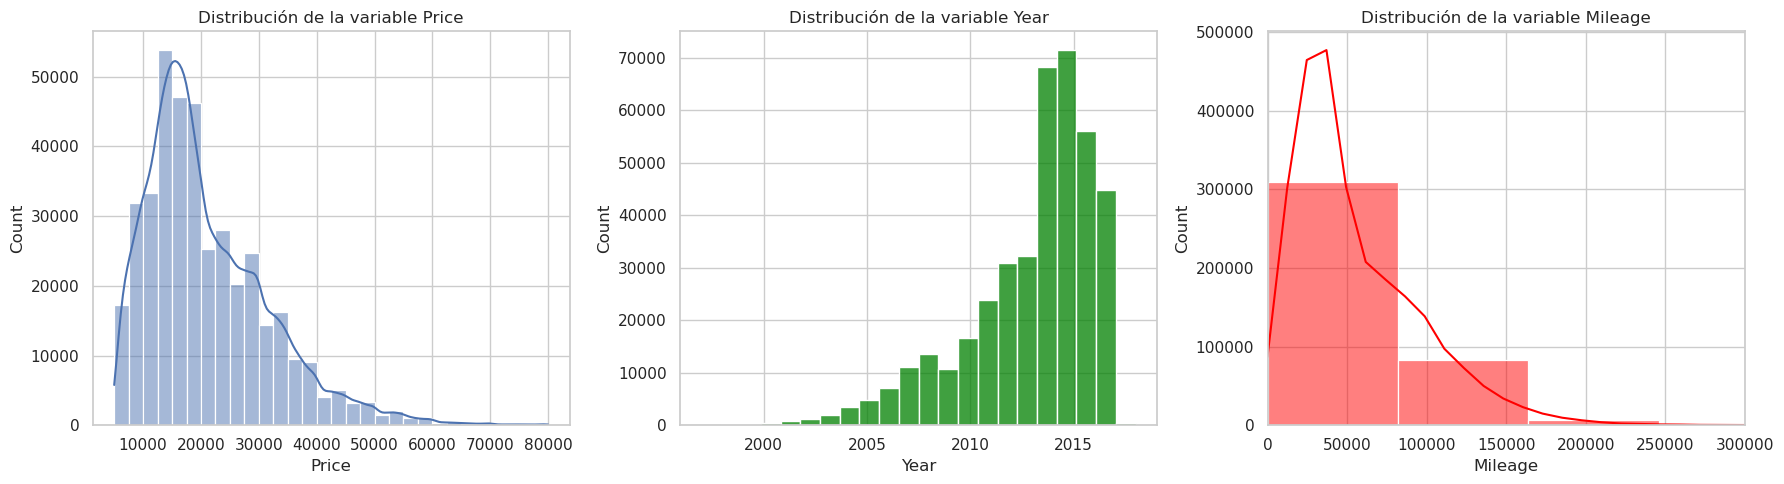

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Condigurar el estilo de las gráficas
sns.set(style="whitegrid")

# Configuración del tamaño de las gráficas
plt.figure(figsize=(18, 5))

# Histograma de 'Price'
plt.subplot(1, 3, 1)
sns.histplot(dataTraining['Price'], bins=30, kde=True)
plt.title('Distribución de la variable Price')

# Histograma de 'Year'
plt.subplot(1, 3, 2)
sns.histplot(dataTraining['Year'], bins=22, kde=False, color='green')
plt.title('Distribución de la variable Year')

# Histograma de 'Mileage'
plt.subplot(1, 3, 3)
sns.histplot(dataTraining['Mileage'], bins=30, kde=True, color='red')
plt.title('Distribución de la variable Mileage')
plt.xlim(0, 300000)  

# Se muestran los gráficos
plt.tight_layout()
plt.show()

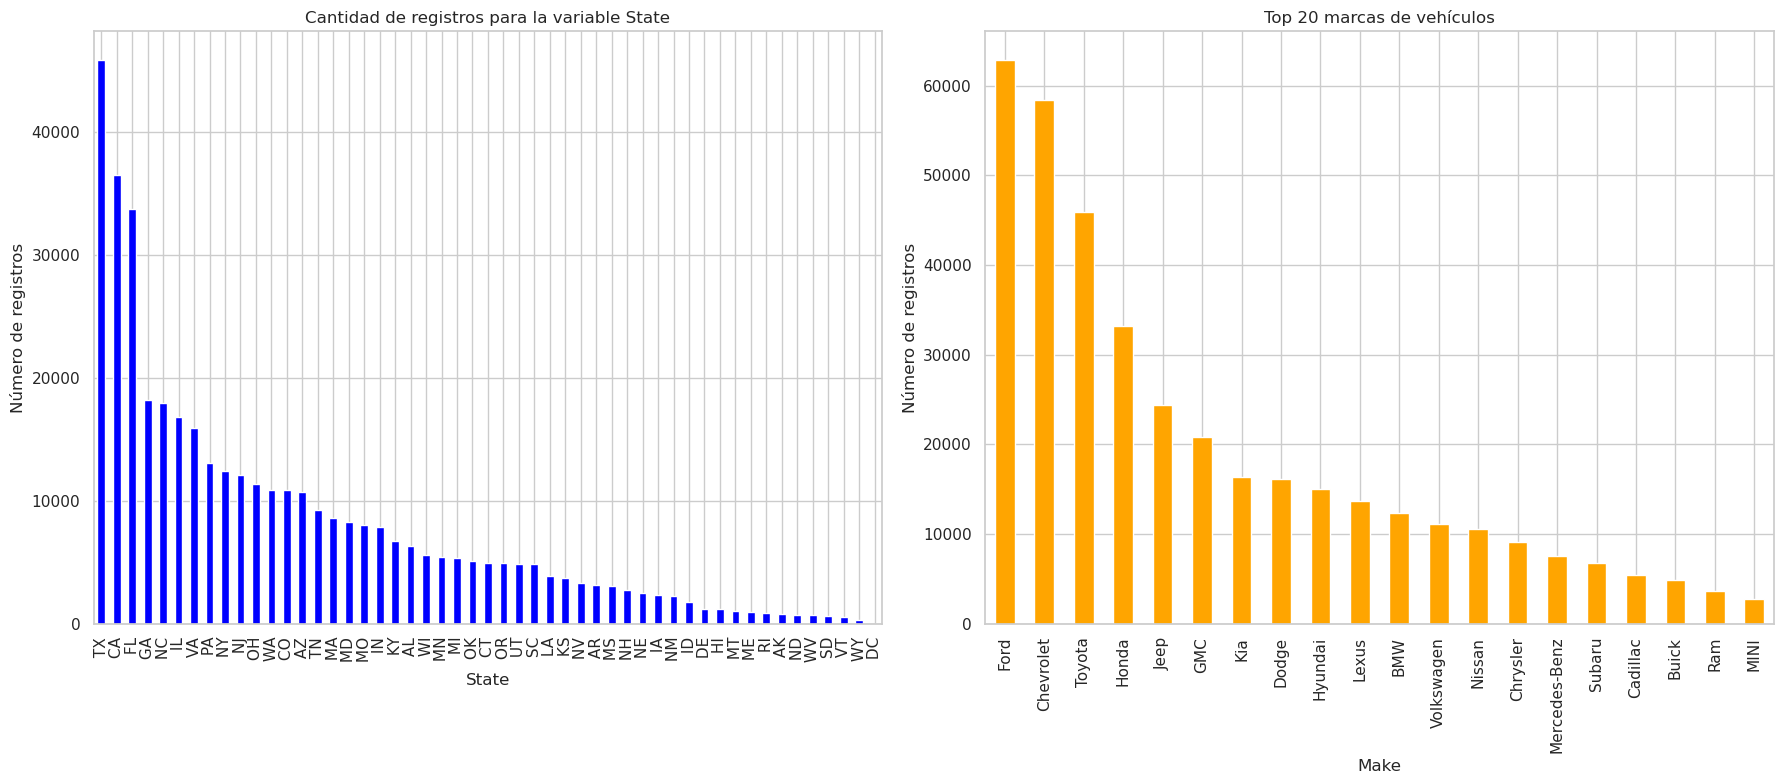

In [11]:
# Configuración del tamaño de las gráficas
plt.figure(figsize=(18, 8))

# Conteo de registros por variable
state_counts = dataTraining['State'].value_counts()
make_counts = dataTraining['Make'].value_counts().nlargest(20) 

# Bar plot para 'State'
plt.subplot(1, 2, 1)
state_counts.plot(kind='bar', color='blue')
plt.title('Cantidad de registros para la variable State')
plt.ylabel('Número de registros')
plt.xlabel('State')

# Bar plot para 'Make'
plt.subplot(1, 2, 2)
make_counts.plot(kind='bar', color='orange')
plt.title('Top 20 marcas de vehículos')
plt.ylabel('Número de registros')
plt.xlabel('Make')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

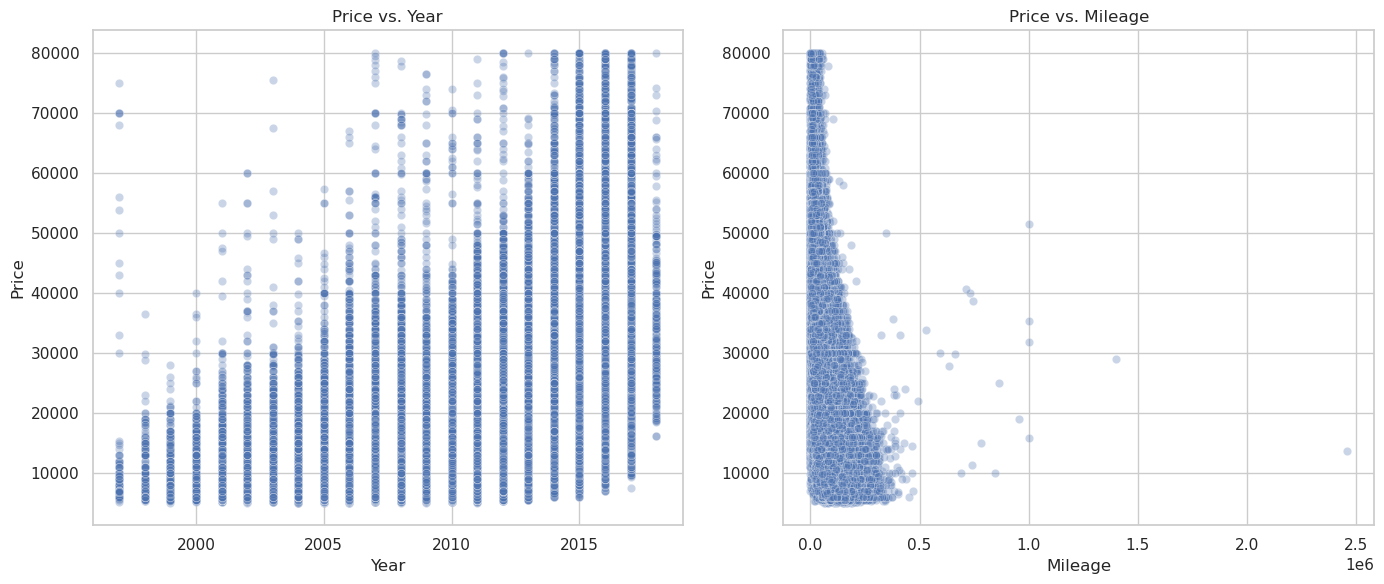

In [12]:
# Configuración del tamaño de las gráficas
plt.figure(figsize=(14, 6))

# Scatter plot de 'Price' vs 'Year'
plt.subplot(1, 2, 1)
sns.scatterplot(data=dataTraining, x='Year', y='Price', alpha=0.3)
plt.title('Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Price')

# Scatter plot de 'Price' vs 'Mileage'
plt.subplot(1, 2, 2)
sns.scatterplot(data=dataTraining, x='Mileage', y='Price', alpha=0.3)
plt.title('Price vs. Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')

# Ajustar las gráficas y mostrarlas
plt.tight_layout()
plt.show()

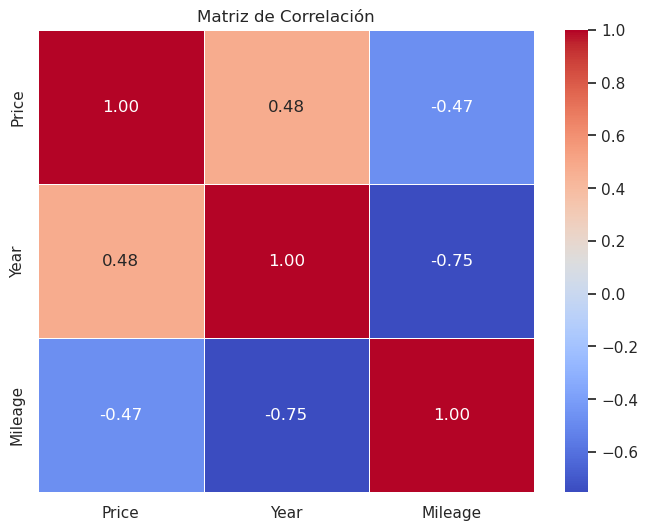

In [13]:
# Matriz de correllación
correlation_matrix = dataTraining[['Price', 'Year', 'Mileage']].corr()

# Heatmap para la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

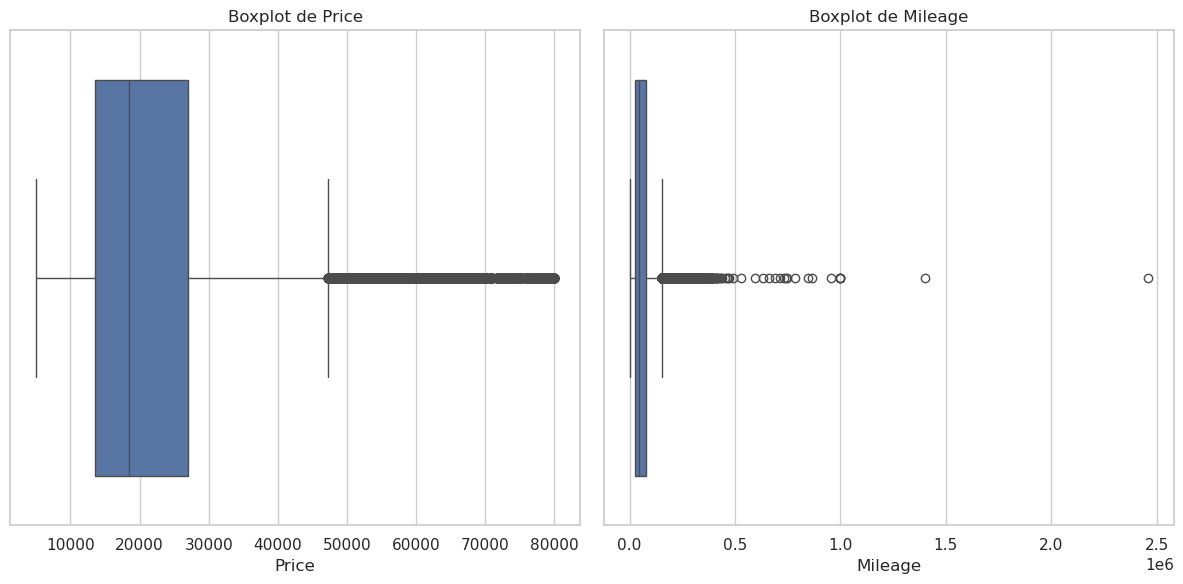

In [15]:
# Ajuste de la figura para mostrar las gráficas
plt.figure(figsize=(12, 6))

# Boxplot para 'Price'
plt.subplot(1, 2, 1)
sns.boxplot(x=dataTraining['Price'])
plt.title('Boxplot de Price')

# Boxplot para 'Mileage'
plt.subplot(1, 2, 2)
sns.boxplot(x=dataTraining['Mileage'])
plt.title('Boxplot de Mileage')

# Ajustar el lienzo y mostrar la gráfica
plt.tight_layout()
plt.show()

In [7]:
# Calcular los valores faltantes de cada columna
missing_values = dataTraining.isnull().sum()

# Calcular el número de entradas únicas por cada columna
unique_entries = dataTraining.nunique()

print(missing_values)
print(unique_entries)

Price      0
Year       0
Mileage    0
State      0
Make       0
Model      0
dtype: int64
Price       35867
Year           22
Mileage    130600
State          51
Make           38
Model         525
dtype: int64


## Feature Engineering

In [12]:
# Copia de los datos originales
df_Training = dataTraining.copy()
df_Testing = dataTesting.copy()

In [13]:
current_year = 2024

# Calcular la edad de cada vehículo
df_Training['Age'] = current_year - df_Training['Year']
df_Testing['Age'] = current_year - df_Testing['Year']

In [16]:
df_Training['CarModel'] = df_Training['Make'] + '-' + df_Training['Model']
df_Testing['CarModel'] = df_Testing['Make'] + '-' + df_Testing['Model']

In [17]:
df_Training.drop(['Year', 'Make', 'Model'], axis=1, inplace=True)
df_Testing.drop(['Year', 'Make', 'Model'], axis=1, inplace=True)

## Preparación de los datos

In [30]:
# Separación de los datos de entrenamiento en X y y 
X = df_Training.drop('Price', axis=1)
y = df_Training['Price']

In [31]:
# Identificación de las variables por tipo
categorical_features = ['State', 'CarModel']
numerical_features = ['Mileage', 'Age']

In [32]:
# Train y Test split
from sklearn.model_selection import train_test_split

# Partición de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)

In [33]:
# Procesador para aplicar escalamiento y encoding
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough')

In [34]:
# Ajuste de los datos de entrenamiento
X_train_processed = preprocessor.fit_transform(X_train)

In [35]:
# Ajuste de los datos de prueba
X_test_processed = preprocessor.transform(X_test)

In [36]:
# Validación del tamaño de los datos de entrenamiento y prueba
print(X_train_processed.shape)
print(X_test_processed.shape)

(300000, 589)
(100000, 589)


## Regresión Lineal

In [29]:
# Regresión con dos variables Mileage y Antiguedad

# Importación de librerías
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Preparación de los datos
X_lr = df_Training[['Mileage', 'Age']]  
           
# Partición de los datos
X_train, X_test, y_train, y_test = train_test_split(X_lr, y, test_size=0.25, random_state=43)

# Configuración del modelo 
model = LinearRegression()

# Entrenamiento del modelo
model.fit(X_train, y_train)

# Predicción de precios
y_pred = model.predict(X_test)

# Cálculo del RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 9249.622272701556


In [38]:
# Regresión con todas las variables

# Configuración del modelo 
model = LinearRegression()
model.fit(X_train_processed, y_train)

# Predicción 
y_pred = model.predict(X_test_processed)

# Evaluación
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 4406.145102554704


In [39]:
# Regresión Ridge con todas las variables

# Importación de librerías
from sklearn.linear_model import Ridge

# Configuración
ridge_model = Ridge(alpha=0.01)

# Entrenamiento
ridge_model.fit(X_train_processed, y_train)

# Predicción
y_pred = ridge_model.predict(X_test_processed)

# Evaluación
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 4406.538695758921


In [92]:
# Regresión Ridge con búsqueda de mejor alpha

# Importación de librerías
from sklearn.linear_model import RidgeCV

# Alphas a validar
alpha_values = [0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0]

# Configuración de modelo
ridge_cv_model = RidgeCV(alphas=alpha_values, store_cv_values=True)

# Entrenamiento
ridge_cv_model.fit(X_train_processed, y_train)

# Mejor alpha
best_alpha = ridge_cv_model.alpha_

# predicción
y_pred = ridge_cv_model.predict(X_test_processed)

# Evaluación
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('RMSE:', rmse)
print('Mejor alpha:', best_alpha)

RMSE: 4406.111634395623
Mejor alpha: 0.1


## Random Forest

In [40]:
# Importación de librerías
from sklearn.ensemble import RandomForestRegressor

# Configuración del modelo 
rf_model = RandomForestRegressor(n_estimators=100, random_state=43)

# Entrenamiento del modelo
rf_model.fit(X_train_processed, y_train)

# Predicción
y_pred_rf = rf_model.predict(X_test_processed)

# Evaluación
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print('RMSE:', rmse_rf)

RMSE: 3855.3120041979223


In [107]:
dataTesting.loc[len(dataTesting.index)] = [2024, 0, ' MD', 'Freightliner', 'Wrangler'] 

In [108]:
dataTesting.tail()

,Year,Mileage,State,Make,Model
ID,,,,,
99996,2015,19711,UT,BMW,5
99997,2016,48049,CA,Nissan,MuranoAWD
99998,2017,15306,CO,Jeep,PatriotSport
99999,2013,40393,TX,BMW,1
100000,2024,0,MD,Freightliner,Wrangler


In [110]:
current_year = 2024

# Calcular la edad de cada vehículo
dataTesting['Age'] = current_year - dataTraining['Year']

# Importación de variables
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# OneHotEncoder 
categorical_features = ['Make', 'Model', 'State']
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

# Trasformación de columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', one_hot_encoder, categorical_features)
    ],
    remainder='passthrough')

# Aplicación de transformaciones
X = dataTesting[['Mileage', 'Age', 'Make', 'Model', 'State']] 

# Transformación de datos
X = preprocessor.fit_transform(X)

In [111]:
y_val_rf = rf_model.predict(X)

In [112]:
y_pred = pd.DataFrame(y_val_rf, index=dataTesting.index, columns=['Price'])

In [113]:
y_pred.to_csv('test_submission.csv', index_label='ID')
y_pred.head()

,Price
ID,
0,25389.21
1,35210.67
2,13675.80
3,22819.47
4,24164.73


## Gradient Boosting Regression

In [41]:
# Iniciar modelo Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr_model = GradientBoostingRegressor(random_state=43)

In [42]:
# Entrenamiento del modelo
gbr_model.fit(X_train_processed, y_train)

GradientBoostingRegressor(random_state=43)

In [44]:
# Predicción
y_pred = gbr_model.predict(X_test_processed)

In [45]:
# Cálculo del RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 7090.72868186959


## Árbol de decisión

In [46]:
# Importación de librería
from sklearn.tree import DecisionTreeRegressor

# Iniciar modelo Gradient Boosting Regressor
dt_model = DecisionTreeRegressor(random_state=43)

# Entrenamiento del modelo
dt_model.fit(X_train_processed, y_train)

# Predicciones
y_pred = dt_model.predict(X_test_processed)

# Cálculo del RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 4784.206675003039


## Random forest 2

In [47]:
# Importación de librerías
from sklearn.ensemble import RandomForestRegressor

# Configuración del modelo 
rf_model = RandomForestRegressor(n_estimators=900, 
                                 max_features='sqrt',
                                 max_depth=10,
                                 min_samples_split=5,
                                 min_samples_leaf=5,
                                 random_state=43,
                                 n_jobs=-1)

# Entrenamiento del modelo
rf_model.fit(X_train_processed, y_train)

# Predicción
y_pred_rf = rf_model.predict(X_test_processed)

# Evaluación
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print('RMSE:', rmse_rf)

RMSE: 8887.625256946414


In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Definición del rango para n_estimators
n_estimators_range = [10, 50, 100, 200, 500]

# Lista para los valores de RMSE
rmse_values = []

# Loop para entrenar un modelo y calcular RMSE para cada valor de n_estimators
for n_estimators in n_estimators_range:
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train_processed, y_train)
    
    # Predicción
    y_pred = model.predict(X_test_processed)
    
    # RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values.append(rmse)
    
    print(f"n_estimators: {n_estimators}, RMSE: {rmse}")


n_estimators: 10, RMSE: 3963.0404570300034
n_estimators: 50, RMSE: 3869.1187960240177
n_estimators: 100, RMSE: 3856.2137934282673
n_estimators: 200, RMSE: 3852.7437100623647
